OpenClassrooms
Project 4, Data Scientist
Author : Oumeima EL GHARBI
Date : August,September 2022

# Feature Engineering to predict Energies

### Introduction

#### Importing libraries

In [29]:
%reset -f

import pickle

import warnings
warnings.filterwarnings(action="ignore")

from exploration import *

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [30]:
# Heure démarrage
t0 = time()

# seed pour les générateurs aléatoires
seed = 1
print("Seed value: ", seed)

Seed value:  1


In [31]:
all_energy_dir = ["electricity", "steam", "gas", "steam_gas"]
all_energy_names = ["Ratio_Electricity","Ratio_Steam", "Ratio_Gas",  "Ratio_Steam+Gas"] #"Log-TotalEnergy(kBtu)"

#all_energy_names = ["Log-SteamUse(kBtu)", "Log-Electricity(kBtu)", "Log-NaturalGas(kBtu)", "Log-TotalEnergy(kBtu)"]

experiment_dir = "./Experiment_2_ratio/"
path_energy = "dataset/energy/"

#### Loading dataset

In [32]:
#train_energy_file = experiment_dir + path_energy + "train_energy.csv"

#test_energy_file = experiment_dir + path_energy + "test_energy.csv"

train_energy_file = path_energy + "train_energy.csv"

test_energy_file = path_energy + "test_energy.csv"

train_energy = pd.read_csv(train_energy_file, sep=",")
test_energy = pd.read_csv(test_energy_file, sep=",")

dataset = pd.concat([train_energy, test_energy], ignore_index=True) # reindexation

In [33]:
dataset_energy = dataset.iloc[:, :-7] # -6 for experiment 1

In [34]:
dataset_energy.shape

(3147, 50)

In [35]:
dataset_energy.columns

Index(['Neighborhood_Ballard', 'Neighborhood_Central', 'Neighborhood_Delridge',
       'Neighborhood_Downtown', 'Neighborhood_East',
       'Neighborhood_Greater duwamish', 'Neighborhood_Lake union',
       'Neighborhood_Magnolia / queen anne', 'Neighborhood_North',
       'Neighborhood_Northeast', 'Neighborhood_Northwest',
       'Neighborhood_Southeast', 'Neighborhood_Southwest',
       'BuildingType_Campus', 'BuildingType_Multifamily hr (10+)',
       'BuildingType_Multifamily lr (1-4)',
       'BuildingType_Multifamily mr (5-9)', 'BuildingType_Nonresidential',
       'BuildingType_Nonresidential cos', 'BuildingType_Sps-district k-12',
       'PrimaryPropertyType_Distribution center',
       'PrimaryPropertyType_High-rise multifamily',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 school', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large office',
       'PrimaryPropertyType_Low-rise multifamily',
       'Prima

In [36]:
dataset

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,ENERGYSTARScore,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1927,0.546060,0.277302,0.176638,0.453940,4.539401e-01,60.0,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.072892,2.153810,1996,0.386609,0.000000,0.613391,0.613391,6.133909e-01,61.0,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1969,0.682307,0.297113,0.020579,0.317693,3.176926e-01,43.0,7.645053
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1999,0.609884,0.000000,0.390116,0.390116,3.901160e-01,NaN,5.713106
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1926,0.577418,0.361423,0.061159,0.422582,4.225819e-01,NaN,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.527976,-0.439239,2015,0.472329,0.000000,0.527671,0.527671,5.276708e-01,100.0,5.330397
3143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.944811,1.780089,2015,1.000000,0.000000,0.000000,0.000000,1.156743e-07,84.0,2.776954
3144,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.478762,3.044854,2015,0.600466,0.000000,0.399534,0.399534,3.995342e-01,NaN,6.908815
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.298680,-0.439239,2015,0.559873,0.000000,0.440127,0.440127,4.401271e-01,100.0,4.583947


### 1) Predict each energy

In [37]:

def predict_energies(df_energy, list_energy_dir):
    """

    """
    for index, energy_dir in enumerate(list_energy_dir):

        # we load each best model for each energy features
        filename = 'model/{}/best_model_{}.sav'.format(energy_dir, energy_dir)
        best_model_energy = pickle.load(open(filename, 'rb'))

        y_pred_energy = best_model_energy.predict(df_energy)
        series_y_pred = pd.Series(y_pred_energy)
        # we put into one Series the prediction of the train set and test set
        df_pred = pd.DataFrame(series_y_pred, columns=[all_energy_names[index]])

        print("Step :", index, energy_dir)
        #display(df_pred) # OK

        if index == 0:
            df_energy_after = pd.DataFrame({})
        df_energy_after = pd.concat([df_energy_after, df_pred], axis=1)

    display(df_energy_after)
    return df_energy_after

dataset_predicted_energies = predict_energies(dataset_energy, all_energy_dir)

Step : 0 electricity
Step : 1 steam
Step : 2 gas
Step : 3 steam_gas


,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas
0,0.546002,0.277190,0.198674,0.472914
1,0.513258,0.045499,0.445521,0.501814
2,0.581044,0.216133,0.202555,0.405701
3,0.676572,0.005698,0.295001,0.330792
4,0.653771,0.203643,0.191364,0.340176
...,...,...,...,...
3142,0.704852,0.000979,0.247629,0.297068
3143,0.753962,0.002626,0.264936,0.247165
3144,0.703051,0.002689,0.288172,0.280553
3145,0.692616,0.000979,0.314655,0.311241


In [38]:
#dataset["Log-TotalGHGEmissions"].index.unique()

In [39]:
#dataset_predicted_energies.index

In [40]:
dataset_CO2 = pd.concat([dataset_predicted_energies, dataset["Log-TotalGHGEmissions"], dataset["ENERGYSTARScore"]], axis=1)

display(dataset_CO2)

,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions,ENERGYSTARScore
0,0.546002,0.277190,0.198674,0.472914,5.525373,60.0
1,0.513258,0.045499,0.445521,0.501814,5.693261,61.0
2,0.581044,0.216133,0.202555,0.405701,7.645053,43.0
3,0.676572,0.005698,0.295001,0.330792,5.713106,NaN
4,0.653771,0.203643,0.191364,0.340176,5.404972,NaN
...,...,...,...,...,...,...
3142,0.704852,0.000979,0.247629,0.297068,5.330397,100.0
3143,0.753962,0.002626,0.264936,0.247165,2.776954,84.0
3144,0.703051,0.002689,0.288172,0.280553,6.908815,NaN
3145,0.692616,0.000979,0.314655,0.311241,4.583947,100.0


### 2) Preparing dataset CO2 without ENERGYSTARScore

#### 1) Selection of features

In [41]:
# liste des variables et étiquettes
model_CO2_target = ['Log-TotalGHGEmissions']
model_CO2_features = dataset_CO2.columns.tolist()[:-2]
#model_CO2_features = ['Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)', 'Log-TotalEnergy(kBtu)']
model_CO2 = model_CO2_features + model_CO2_target

model_CO2

['Ratio_Electricity',
 'Ratio_Steam',
 'Ratio_Gas',
 'Ratio_Steam+Gas',
 'Log-TotalGHGEmissions']

#### 2) Separation train and test dataset


In [42]:
# We create a training set and a test set (the test set contains 30% of the dataset)
train_common, test_common = train_test_split(dataset_CO2, test_size=0.3,  random_state=seed)

train_common

,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions,ENERGYSTARScore
1008,0.854342,0.001442,0.171921,0.137230,1.865629,60.0
1784,0.390878,0.002786,0.555777,0.623363,3.089223,90.0
1563,0.944326,0.001442,0.058196,0.052989,2.585506,98.0
452,0.791006,0.016417,0.160123,0.198429,3.421653,NaN
1561,0.958737,0.001442,0.049718,0.031791,1.536867,82.0
...,...,...,...,...,...,...
2763,0.748376,0.002767,0.355986,0.261885,3.639689,47.0
905,0.684290,0.001442,0.268090,0.317799,1.291984,53.0
1096,0.368116,0.002767,0.622640,0.623057,3.507058,63.0
235,0.722768,0.003732,0.281762,0.287231,4.321613,NaN


In [43]:
# Selection des variables pour modélisation CO2
train_CO2, test_CO2 = train_common[model_CO2], test_common[model_CO2]

In [44]:
train_CO2

,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
1008,0.854342,0.001442,0.171921,0.137230,1.865629
1784,0.390878,0.002786,0.555777,0.623363,3.089223
1563,0.944326,0.001442,0.058196,0.052989,2.585506
452,0.791006,0.016417,0.160123,0.198429,3.421653
1561,0.958737,0.001442,0.049718,0.031791,1.536867
...,...,...,...,...,...
2763,0.748376,0.002767,0.355986,0.261885,3.639689
905,0.684290,0.001442,0.268090,0.317799,1.291984
1096,0.368116,0.002767,0.622640,0.623057,3.507058
235,0.722768,0.003732,0.281762,0.287231,4.321613


#### 3) Standardization of numerical variables

In [45]:
train_CO2[model_CO2_features]

,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas
1008,0.854342,0.001442,0.171921,0.137230
1784,0.390878,0.002786,0.555777,0.623363
1563,0.944326,0.001442,0.058196,0.052989
452,0.791006,0.016417,0.160123,0.198429
1561,0.958737,0.001442,0.049718,0.031791
...,...,...,...,...
2763,0.748376,0.002767,0.355986,0.261885
905,0.684290,0.001442,0.268090,0.317799
1096,0.368116,0.002767,0.622640,0.623057
235,0.722768,0.003732,0.281762,0.287231


In [46]:
# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scaler_CO2 = StandardScaler().fit(train_CO2[model_CO2_features])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_CO2_std, test_CO2_std = train_CO2.copy(), test_CO2.copy()

train_CO2_std[model_CO2_features] = std_scaler_CO2.transform(train_CO2[model_CO2_features])
test_CO2_std[model_CO2_features] = std_scaler_CO2.transform(test_CO2[model_CO2_features])

In [47]:
print("Before")
display(train_CO2)
print("After")
display(train_CO2_std)

Before


,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
1008,0.854342,0.001442,0.171921,0.137230,1.865629
1784,0.390878,0.002786,0.555777,0.623363,3.089223
1563,0.944326,0.001442,0.058196,0.052989,2.585506
452,0.791006,0.016417,0.160123,0.198429,3.421653
1561,0.958737,0.001442,0.049718,0.031791,1.536867
...,...,...,...,...,...
2763,0.748376,0.002767,0.355986,0.261885,3.639689
905,0.684290,0.001442,0.268090,0.317799,1.291984
1096,0.368116,0.002767,0.622640,0.623057,3.507058
235,0.722768,0.003732,0.281762,0.287231,4.321613


After


,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
1008,0.775627,-0.291490,-0.543152,-0.815812,1.865629
1784,-2.168321,-0.254859,2.000406,2.230628,3.089223
1563,1.347213,-0.291490,-1.296733,-1.343727,2.585506
452,0.373317,0.116762,-0.621332,-0.432299,3.421653
1561,1.438753,-0.291490,-1.352912,-1.476565,1.536867
...,...,...,...,...,...
2763,0.102524,-0.255376,0.676522,-0.034639,3.639689
905,-0.304549,-0.291490,0.094098,0.315756,1.291984
1096,-2.312906,-0.255376,2.443463,2.228710,3.507058
235,-0.060136,-0.229079,0.184688,0.124193,4.321613


#### 4) Distribution of variables

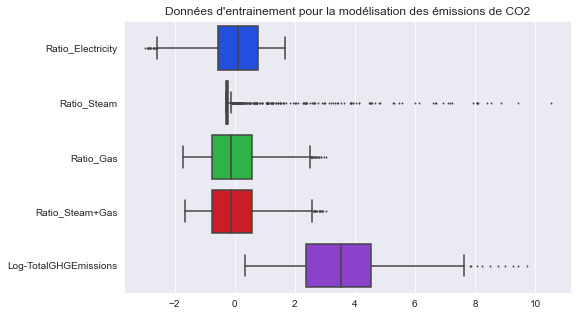

In [48]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_CO2_std), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

#### 5) Saving dataset

In [49]:
path_save_CO2 = "dataset/CO2/"

# Sauvegarde des jeux de données
train_CO2_std.to_csv("{}{}".format(path_save_CO2, "train_CO2.csv"), encoding='utf-8', index=False)
test_CO2_std.to_csv("{}{}".format(path_save_CO2, "test_CO2.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_CO2, 'scaler_features': model_CO2_features}
filename = 'model/scaler_CO2.sav'
pickle.dump(model, open(filename, 'wb'))

### 3) Preparing dataset CO2 with ENERGYSTARScore

#### 1) Selection of features

In [50]:
# Liste des variables et étiquettes pour la modélisation
model_EnergyStarScore_target = ['Log-TotalGHGEmissions']
model_EnergyStarScore_features = model_CO2_features + ['ENERGYSTARScore']
model_EnergyStarScore = model_EnergyStarScore_features + model_EnergyStarScore_target

model_EnergyStarScore

['Ratio_Electricity',
 'Ratio_Steam',
 'Ratio_Gas',
 'Ratio_Steam+Gas',
 'ENERGYSTARScore',
 'Log-TotalGHGEmissions']

#### 2) Separation train and test dataset


In [51]:
# we drop the buildings for which the EnergyStarScore is missing
dataset_clean = dataset_CO2.dropna(axis=0)

train_clean, test_clean = train_test_split(dataset_clean, test_size=0.3, random_state=seed)

train_clean

,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions,ENERGYSTARScore
920,0.677096,0.010471,0.290017,0.329086,5.486414,89.0
2752,0.439647,0.002786,0.510547,0.552855,3.322515,52.0
478,0.935194,0.001442,0.058196,0.059630,2.540026,59.0
679,0.530201,0.002767,0.488296,0.483229,3.033028,92.0
147,0.944726,0.012529,0.028754,0.040840,5.825912,69.0
...,...,...,...,...,...,...
1296,0.985210,0.001442,-0.007830,0.005284,1.499623,77.0
1219,0.668143,0.001442,0.274989,0.310044,4.120175,100.0
1483,0.293711,0.004265,0.622699,0.716724,3.884446,80.0
330,0.797425,0.029535,0.164302,0.179315,4.248781,89.0


In [52]:
# Selection des variables pour modélisation CO2
train_EnergyStarScore, test_EnergyStarScore = train_clean[model_EnergyStarScore], test_clean[model_EnergyStarScore]

In [53]:
train_EnergyStarScore

,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,ENERGYSTARScore,Log-TotalGHGEmissions
920,0.677096,0.010471,0.290017,0.329086,89.0,5.486414
2752,0.439647,0.002786,0.510547,0.552855,52.0,3.322515
478,0.935194,0.001442,0.058196,0.059630,59.0,2.540026
679,0.530201,0.002767,0.488296,0.483229,92.0,3.033028
147,0.944726,0.012529,0.028754,0.040840,69.0,5.825912
...,...,...,...,...,...,...
1296,0.985210,0.001442,-0.007830,0.005284,77.0,1.499623
1219,0.668143,0.001442,0.274989,0.310044,100.0,4.120175
1483,0.293711,0.004265,0.622699,0.716724,80.0,3.884446
330,0.797425,0.029535,0.164302,0.179315,89.0,4.248781


#### 3) Standardization of numerical variables

In [54]:
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_EnergyStarScore_std, test_EnergyStarScore_std = train_EnergyStarScore.copy(), test_EnergyStarScore.copy()

std_scaler_EnergyStarScore = StandardScaler()  # other way of writing the scaling
train_EnergyStarScore_std[model_EnergyStarScore_features] = std_scaler_EnergyStarScore.fit_transform(
    train_EnergyStarScore[model_EnergyStarScore_features])

test_EnergyStarScore_std[model_EnergyStarScore_features] = std_scaler_EnergyStarScore.transform(
    test_EnergyStarScore[model_EnergyStarScore_features])

In [55]:
train_EnergyStarScore_std

,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,ENERGYSTARScore,Log-TotalGHGEmissions
920,-0.404450,-0.054118,0.313321,0.439685,0.804084,5.486414
2752,-1.854114,-0.249104,1.729085,1.789226,-0.579475,3.322515
478,1.171282,-0.283197,-1.174927,-1.185387,-0.317721,2.540026
679,-1.301266,-0.249585,1.586238,1.369315,0.916265,3.033028
147,1.229475,-0.001889,-1.363937,-1.298711,0.056214,5.825912
...,...,...,...,...,...,...
1296,1.476634,-0.283197,-1.598801,-1.513148,0.355362,1.499623
1219,-0.459108,-0.283197,0.216845,0.324845,1.215413,4.120175
1483,-2.745077,-0.211579,2.449086,2.777511,0.467543,3.884446
330,0.330180,0.429600,-0.493743,-0.463574,0.804084,4.248781


#### 4) Distribution of variables

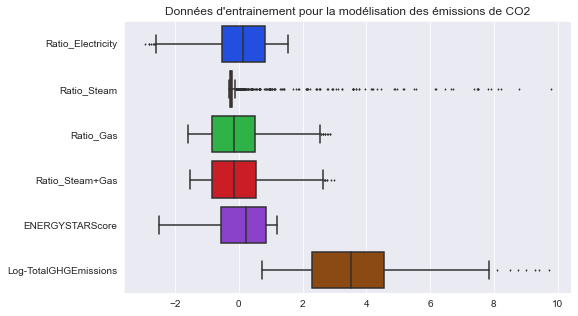

In [56]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_EnergyStarScore_std), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

#### 5) Saving dataset

In [57]:
path_save_EnergyStarScore = "dataset/CO2_EnergyStarScore/"

# Sauvegarde des jeux de données
train_EnergyStarScore_std.to_csv("{}{}".format(path_save_EnergyStarScore, "train_EnergyStarScore.csv"), encoding='utf-8', index=False)
test_EnergyStarScore_std.to_csv("{}{}".format(path_save_EnergyStarScore, "test_EnergyStarScore.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_EnergyStarScore, 'scaler_features': model_EnergyStarScore_features}
filename = 'model/scaler_EnergyStarScore.sav'
pickle.dump(model, open(filename, 'wb'))

In [58]:
t1 = time()
print("computing time : {:8.6f} sec".format(t1-t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1-t0)))

computing time : 1.507609 sec
computing time : 00:00:01
